Imports

In [1]:
# Basics
import re

# Multiprocessing
import multiprocess as mp
import concurrent.futures
import threading

# Data
import numpy as np
import pandas as pd
from matplotlib import pyplot

# Country codes
import pycountry

# Rasters - pixel data
import rasterio
from rasterio.plot import show
from rasterio.features import rasterize

# Polygons - country outlines
from shapely.geometry import Polygon
import geopandas as gpd
from scripts.countryoutlines import CountryOutlines  # custom class

# Custom classes for Hansen et al., 2013
from scripts.hansenhandler import HansenHandler, DataType
from scripts.tile import Tile


In [5]:
# a = np.array("0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 \
#  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 \
#  48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 \
#  72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 \
#  96 97 98".split(" "))

a = np.arange(100)
a.dtype

dtype('int64')

In [2]:
import tilestats

df = tilestats.make_table((-10,170), False)

print(df)

# a = np.arange(20)

# b = a % 10

# c = (a > 8) & (b > 8)
# c

-20 -10
[0 4 6 8]
[0 8]
[0 1 2 3 4]
50
[ 0  1  2  3  4 40 41 42 43 44]
(50,)
[ 1737013  1216183  2466939  2445452 16546779        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
      719      149      297      761     9143        0        0        0
        0        0]
   code  group        minx       miny        maxx       maxy          country  \
0   FJI      2  176.899719 -19.193611  180.000000 -12.461724             Fiji   
1   FJI      2  176.899719 -19.193611  180.000000 -12.461724             Fiji   
2   FJI      2  176.899719 -19.193611  180.000000 -12.461724             Fiji   
3   FJI      2  176.899719 -19.193611  180.000000 -12.461724             Fiji   
4   FJI      2  176.899719 -19.193611  180.000000 -12.461724

In [4]:
df.to_csv("practice.csv", index=False)

In [76]:
a = np.arange(101)

(a-1) // 25 + 1

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

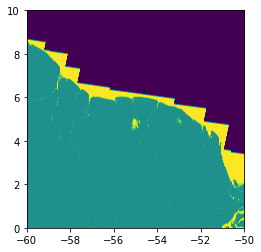

In [67]:
def read_band(raster, window=None, return_affine=False):
    if window:
        band = raster.read(1, window=window)
        affine = raster.window_transform(window)
    else:
        band = raster.read(1)
        affine = raster.transform

    if return_affine:
        return (band, affine)
    else:
        return band

tile = Tile(10,-60)
with tile.load_data(DataType.datamask) as mask_raster:
    show((mask_raster, 1))
    

In [83]:
def read_band(raster, window=None, return_affine=False):
    if window:
        band = raster.read(1, window=window)
        affine = raster.window_transform(window)
    else:
        band = raster.read(1)
        affine = raster.transform

    if return_affine:
        return (band, affine)
    else:
        return band

tile = Tile(10,-60)
with tile.load_data(DataType.datamask) as mask_raster:
    m = read_band(mask_raster)
    print(m.shape)

(40000, 40000)


In [90]:
cancer = 23.4372
capricorn = -23.4394
ilat = lambda x: int((10 - x % 10) * 4000)

ilat(0.005)

39980

In [6]:
np.bincount(geom.flatten(), np.random.random((20,20)).flatten())

array([103.28207847,  51.60066119,  47.71829118])

In [19]:
10 // 3

3

In [14]:
latlon = [(lat, long)
               for lat in range(-50, 90, 10)
               for long in range(-180, 180, 10)]

n_tiles = len(latlon)
splits = range(10, n_tiles, 10)
# lats = np.arange(-50,90,10)
# longs = np.arange(-180,180,10)
batches = np.split(latlon, splits)
# len(batches)
len(batches)


51

In [12]:
a = np.random.randint(0,2,(4,4))
b = np.arange(4).reshape((-1,1))

a[:0,:]

array([], shape=(0, 4), dtype=int64)

Get country ISO alpha 3 codes

In [40]:

# TODO add extra countries
# countries = np.array([[country.alpha_3, country.name] for country in pycountry.countries])
countries = t3.code.values
countries

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ARE', 'ARG',
       'ARM', 'ASM', 'ATA', 'ATF', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI',
       'BEL', 'BEN', 'BES', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH',
       'BLM', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN',
       'BVT', 'BWA', 'CAF', 'CAN', 'CCK', 'CHE', 'CHL', 'CHN', 'CIV',
       'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB',
       'CUW', 'CXR', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO',
       'GGY', 'GHA', 'GIB', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HMD', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ',
       'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR',
       'LBY', 'LCA',

Calculate bounds for each country

In [53]:
# countries_run = countries[:20]  # Can debug on a subset

try:
    # Here's one I made earlier
    df = pd.read_csv("interim/country_bounds2.csv", index_col=[0,1])

except FileNotFoundError:
    # Code to create country bounds

    # Uses multiprocessing to speed up
    nProcesses = 2 * mp.cpu_count()

    with mp.get_context("spawn").Pool(nProcesses) as pool:
        # N.B. for countries spanning the date line,
        # two sets of bounds are created, one each side
        country_bounds = pool.starmap(CountryOutlines.get_bounds, countries)  

    # Combine calculations from different processes
    # TODO make index come out nicely
    df = pd.concat(country_bounds).reset_index()
    # Save
    df.to_csv("interim/country_bounds2.csv")



Create rectangle for calculations by tropics

In [5]:

cancer = 23.4372
capricorn = -23.4394
tropics = Polygon([(-180,cancer),(-180,capricorn),(180,capricorn),(180,cancer)])
tropics = gpd.GeoDataFrame(geometry=[tropics])

plot = False
if plot:
    ax = tropics.plot(facecolor=(1,1,1,0.4), edgecolor='white', linewidth=0.5)

    with rasterio.open("raw/VCF5KYR_1982001_001_2018224204211.tif") as f:
        b1 = f.read(1)
        b2 = f.read(2)
        b3 = f.read(3)
        bands = np.stack((b1,b2,b3),axis=0) / 100

        show(bands, transform=f.transform, ax=ax)

    del b1, b2, b3, bands, f

Start computing means

In [91]:


# hh = HansenHandler
# This code could maybe go in hansenhandler?
latlong = [(lat, long) for lat in range(-50,90,10) for long in range(-180,180,10)]

# floor10 = lambda x: np.floor(x/10)*10
# ceil10 = lambda x: np.ceil(x/10)*10
# count_side = lambda start, end: (ceil10(end) - floor10(start)) / 10
# count_tiles = lambda df: count_side(df.minx, df.maxx) * count_side(df.miny, df.maxy)

# df = df.assign(nTiles = count_tiles)

# df["nTiles"] = df.groupby("country")["nTiles"].transform("sum")


latlong.index((10,20))


236

In [7]:
# Store outlines as they are being used
outlines = {country: None for country in df.country.unique()}

In [46]:
def read_band(raster, mask_band = None, window = None, return_affine=False):
    if window:
        band = raster.read(1, window=window)
        affine = raster.window_transform(window)
    else:
        band = raster.read(1) #, window=win)
        affine = raster.transform  # window_transform(win)

    # if mask_band:
    #     band[mask_band] = 255
    if return_affine:
        return (band, affine)
    else:
        return band

In [13]:
# Things start to take a long time and use a lot of memory from here
# so may move to Econ server

# win = rasterio.windows.Window(20000,20000,20010,20010)
win = None

df[["code","area", "cover_2000", "gain", *(f"loss{y+1}" for y in range(20))]] = 0

i = 0
for coords in latlong:
    tile = Tile(*coords)
    # Subset countries whose bounds overlap
    countries = df[tile.covers_country(df)]
    
    # Check if no countries overlap
    if countries.empty:
        continue

    with tile.load_data(DataType.datamask) as mask_raster:
        mask, mask_affine = read_band(mask_raster, window=win, return_affine=True)
        
        # Check if the tile has no data
        # Might catch situations where country bounding box overlaps but country does not
        if not np.any(mask):
            continue

        area = np.random.random(mask.shape)
        # TODO remove brackets
        with (tile.load_data(DataType.treecover2000) as cover_raster,
            tile.load_data(DataType.gain)            as gain_raster,
            tile.load_data(DataType.lossyear)        as lossyear_raster):

            cover = read_band(cover_raster, window=win)
            # cover[cover <= 25] = 0
            # gain = read_band(gain_raster, window=win)
            # lossyear = read_band(lossyear_raster, window=win)
            countries = countries.droplevel("group")
            
            for c, row in countries.iterrows():
                # Load and save border if not already loaded
                country = row.country
                outline_gdf = outlines[country]
                if outline_gdf is None:
                    outlines[country] = outline_gdf = CountryOutlines.load_country(c)
                
                geom = outline_gdf.geometry
                
                # Or start here
                geom = rasterize(geom, out_shape=mask.shape, transform=mask_affine)
                
                # Check if geom is empty
                if not np.any(geom):
                    print(c, tile.lat, tile.long)
                    continue
                
                
                # Either start here
                # c for country
                mask_c      = mask * geom == 1
                area_c      = area[mask_c]
                cover_c     = cover[mask_c]
                # lossyear_c  = lossyear[mask_c]
                # gain_c      = gain[mask_c]

                # _, n = np.unique(mask.flatten(), return_counts=True)
                df.loc[c,"area"].values[0] += area_c.sum()

                # Look into tensorflow one hot
                df.loc[c,"cover_2000"].values[0] += (cover_c * area_c).sum()

                # df.loc[c, "gain"] += (gain_c * area_c).sum()

                # for year in range(1,20):
                #     yearmask = lossyear_c == year
                #     loss_cy = lossyear_c[yearmask]
                #     cover_cy = cover_c[yearmask]
                #     area_cy = area_c[yearmask]

                #     df.loc[c, f"loss_{year}"] += (loss_cy * cover_cy * area_cy).sum()

                i += 1
                if i > 0:
                    break
            





    




Index(['minx', 'miny', 'maxx', 'maxy', 'country', 'nTiles', 'code', 'area',
       'cover_2000', 'gain', 'loss1', 'loss2', 'loss3', 'loss4', 'loss5',
       'loss6', 'loss7', 'loss8', 'loss9', 'loss10', 'loss11', 'loss12',
       'loss13', 'loss14', 'loss15', 'loss16', 'loss17', 'loss18', 'loss19',
       'loss20'],
      dtype='object')


In [29]:
df.loc["ATA","area"].values[0] += 2
df.loc["ATA","area"]

group
1    10.0
Name: area, dtype: float64

In [ ]:
# Draft code for parallelisation

# def main(infile, outfile, num_workers=4):
#     """Process infile block-by-block and write to a new file

#     The output is the same as the input, but with band order
#     reversed.
#     """

#     with rasterio.open(infile) as src:

#         # Create a destination dataset based on source params. The
#         # destination will be tiled, and we'll process the tiles
#         # concurrently.
#         profile = src.profile
#         profile.update(blockxsize=128, blockysize=128, tiled=True)

#         with rasterio.open(outfile, "w", **src.profile) as dst:
#             windows = [window for ij, window in dst.block_windows()]

#             # We cannot write to the same file from multiple threads
#             # without causing race conditions. To safely read/write
#             # from multiple threads, we use a lock to protect the
#             # DatasetReader/Writer
#             read_lock = threading.Lock()
#             write_lock = threading.Lock()

#             def process(window):
#                 with read_lock:
#                     src_array = src.read(window=window)

#                 # The computation can be performed concurrently
#                 result = compute(src_array)

#                 with write_lock:
#                     dst.write(result, window=window)

#             # We map the process() function over the list of
#             # windows.
#             with concurrent.futures.ThreadPoolExecutor(
#                 max_workers=num_workers
#             ) as executor:
#                 executor.map(process, windows)
#         # For each 

        
#         #     cover, cover_affine = read_band(cover, mask)
#         #     write_pixel_counts(countries, df, )

In [47]:
def area_of_pixels(lat_start, lat_end, n_pixels):
    """Calculate m^2 area of an ndarray of wgs84 square pixels.

    Adapted from: https://gis.stackexchange.com/a/127327/2397
    
    """
    a = 6378137  # meters
    b = 6356752.3142  # meters
    e = np.sqrt(1 - (b/a)**2)
    lower = np.linspace(lat_start, lat_end, n_pixels, endpoint=False)
    
    higher = np.append(lower[1:], lat_end)
    pixel_size = (lat_end - lat_start) / n_pixels
    def subcalc(lats):
        sin_lats = np.sin(np.radians(lats))
        e_sin_lats = e*sin_lats
        zm = 1 - e_sin_lats
        zp = 1 + e_sin_lats
        return np.pi * b**2 * (np.arctanh(e_sin_lats) / e + sin_lats / (zp*zm))

    return pixel_size / 360. * (subcalc(higher) - subcalc(lower))

In [44]:
# area_of_pixels(0, )
test = "3077.2300079"  # official number for pixel going 30' north of equator
# TODO cite source

test2 = area_of_pixels(0,0.5,4)

np.tile(test2.reshape((-1,1)), (1,4))

array([[1.92329103e+08, 1.92329103e+08, 1.92329103e+08, 1.92329103e+08],
       [1.92328212e+08, 1.92328212e+08, 1.92328212e+08, 1.92328212e+08],
       [1.92326430e+08, 1.92326430e+08, 1.92326430e+08, 1.92326430e+08],
       [1.92323757e+08, 1.92323757e+08, 1.92323757e+08, 1.92323757e+08]])

In [18]:
a = np.arange(16).reshape((4,4))
b = np.arange(4)[::-1].reshape((4,1)) * 10

b
np.linspace(5, 1, 10).reshape((-1,1))

(x, y) = (a, b) = (2, 3)
print(a)
print(y)

2
3


In [ ]:
# Draft code to calculate extra countries


# """
# ['XSP: Spratly Islands_1', 'XCA: Caspian Sea_1', 'XKO: Kosovo_3', 'XPI: Paracel Islands_1', 'ZNC: Northern Cyprus_2', 'XAD: Not found', 'XCL: Not found']
# """

# test2 = 

# test = test.splitlines()
# test = [re.match(r'gadm40_(\w+).gpkg', line).groups()[0] for line in test]
# missing = set(test).difference(set([c.alpha_3 for c in pycountry.countries]))
# names = {c.alpha_3: c.name for c in pycountry.countries}
# missing

# test2 = test2.splitlines()
# test2 = [re.match(r'.*"([A-Z]+)_(.+)".*',line).groups() for line in test2]
# test2 = {k: v for (k,v) in test2}
# print([f"{k}: {test2[k]}" if k in test2 else f"{k}: Not found" for k in missing])
# m = re.match(r'.*"([A-Z]+)_([A-Za-z]+).*','<option value="VNM_Vietnam_4">Vietnam</option>')
# m.groups()
# countries